# Découverte du machine learning avec Scikit-learn

## Introduction
Aujourd'hui nous allons utiliser Scikit-learn pour découvrir la mise en place de méthodes d'apprentissage automatique. Scikit-learn est une librairie fournissant des outils de machine learning très variés, supervisés et non supervisés (k-NN, Gaussian Process, PCA, Naive Bayes, SVM etc.). Nous allons donc l'utiliser pour résoudre des problèmes relativement simples. Elle fournit aussi le nécessaire pour réaliser des réseaux de neurones, mais de façon assez limitée.

### Installation
Installez la bibliothèques `scikit-learn` avec pip ou conda (préférez conda si possible).
On va également utilier `matplotlib` et `numpy`.

In [0]:
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graphiques 3D
import numpy as np

print("Version de scikit-learn :", sklearn.__version__)

Version de scikit-learn : 0.20.2


### Charger un `dataset`
Un `dataset` ou jeu de données est un ensemble de données permettant d'entraîner un réseau de neurones. Un jeu de données est un ensemble de correspondances entre :

- Des **features**, les entrées
- Des **labels**, ou les sorties que l'on cherche à prévoir avec le modèle pour des entrées données.

Pour commencer, nous allons prendre un dataset tout simple, associant à des caractéristiques de pétales d'iris () l'espèce correspondante (Setosa, Versicolour, and Virginica). Plus de détails [ici](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()  # Téléchargement du dataset

X = iris.data
y = iris.target

print("Features shape :", X.shape)
print("Labels shape :", y.shape)

Features shape : (150, 4)
Labels shape : (150,)


### Visualiser les données
Il est important avant de se lancer dans de l'analyse de données, de visualiser les données d'une façon ou d'une autre pour vérifier certaines choses
- Quels types de données ?
- Valeurs aberrantes ?
- Equilibre des classes cibles ?
- Intervalles de valeurs ?
- etc.

Text(0, 0.5, 'Petal width')

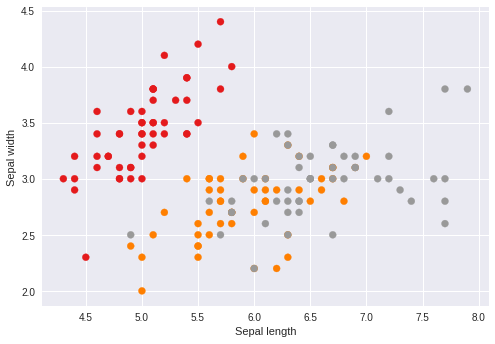

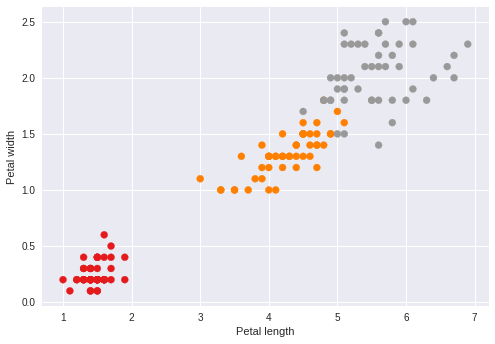

In [0]:
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.figure(2)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='Set1')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


### Améliorer la visualisation des données
Il n'est pas très pratique de bien voir les données car avec 4 features, il faudrait faire un graphe en 4D, ce qui n'est pas très pratique. Pour simplifier le problème et mieux voir ce que l'on fait, essayons de ramener cela en 3D. Comment faire ? C'est de la **réduction de dimension**, de l'apprentissage **non supervisé**.

## Réduction de dimensions
### Principales méthodes
- PCA (principal component analysis) : Probablement la plus utilisée. L'idée est de repérer des variables corrélées (grâce à l'étude du coefficient de corrélation) pouvant donc être réduites à une seule variable sans perte d'information. Par exemple, on peut voir ci-dessus que les 3ème et 4ème composantes sont très liées (linéairement), elles pourraient donc probablement être ramenées à une seule variable.
- Random projections : Technique permettant de trouver un espace de dimension inférieure à l'espace d'origine qui conserve au mieux les distances entre les points.
- Feature agglomeration : basée sur des méthodes de clustering pour regrouper les composantes similaires.

Pour utiliser ces méthodes avec Scikit-learn, voir [ici](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)

Nous allons ici utiliser PCA, car c'est une des plus répandues. Son utilisation est décrite ici : [Documentation PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)


In [0]:
from sklearn.decomposition import PCA

# On crée notre modèle pour obtenir 3 composantes
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)

print("Transformation terminée !")
print("Anciennes données", X.shape, "Nouvelles données", X_reduced3.shape)

Transformation terminée !
Anciennes données (150, 4) Nouvelles données (150, 3)


### Utilisation d'un modèle non supervisé
Tous les modèles non supervisés s'utilisent plus ou moins de la même façon :
- **Création** du modèle, choix des paramètres
- **Entrainement du modèle** avec `fit`
- **Application du modèle** aux données avec `transform`

### Visualisation des nouvelles données

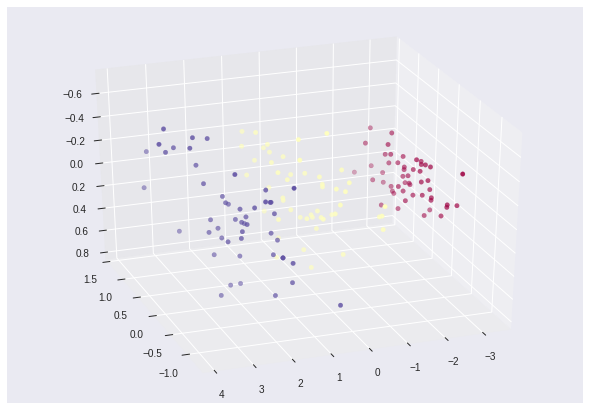

In [0]:
# Création de la figure 3D
fig = plt.figure(0)
ax = Axes3D(fig, elev=-150, azim=110)

# Affichage des valeurs
ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], X_reduced3[:, 2], c=y, cmap='Spectral')

> On peut à présent visualiser toutes nos données sur un graphique 3D. On peut encore réduire le nombre de dimensions, mais le risque est de perdre dans le processus des informations clés indispensables à la classification.

Essayons de le faire en 2D.

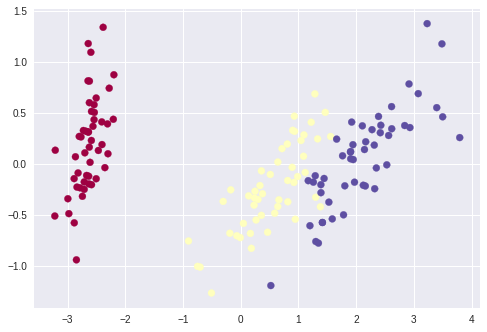

In [0]:
# On crée notre modèle pour obtenir 2 composantes
model_pca2 = PCA(n_components = 2)

# On entraîne notre modèle (fit) sur les données
< Compléter >

# On applique le résultat sur nos données :
X_reduced2 = model_pca2.transform(X)

# Puis on affiche les données
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, cmap='Spectral')

## Classification
A présent, essayons de remplir notre objectif principal, qui était de pouvoir prédire l'espèce d'iris uniquement en connaissant les caractéristiques des pétales

### Démarche à suivre en machine learning
- **Préparer le jeu de données**
- **Séparer données d'entrainement et de test**
- **Choisir le modèle à utiliser**
- **Choisir les paramètres d'entraînement**
- **Entrainer !**
- **Evaluer le modèle**
- **Utiliser**

C'est parti !

### Préparer le jeu de données
On ne le répètera jamais assez, avoir un jeu de données de qualité est compliqué mais indispensable. Il y a toujours des valeurs aberrantes qui se glissent, des classes qui ne sont pas assez représentées, etc. Heureusement, on a ici un jeu de donnée bien préparé pour cet exemple. profitez-en, c'est exceptionnel !

On a bien vérifié que le jeu de données est de qualité avec les méthodes de visualisation précédentes.

### Séparer données d'entrainement et de test
Comment s'assurer que votre modèle fonctionne ? Si on le teste sur les données qu'il a utilisé pour l'entrainement, aucun intérêt, il pourrait les avoir apprises par coeur sans être capable de réagir correctement face à des données qu'il n'a jamais vues. Il faut garder des données pour tester son modèle (en général entre 10% et 20%).

In [0]:
train_ratio = 0.8
l = len(X_reduced2)

X_train = X_reduced2[:int(l * train_ratio)]
X_test = X_reduced2[int(l * train_ratio):]

y_train = y[:int(l * train_ratio)]
y_test = y[int(l * train_ratio):]

print("Données d'entrainement :", len(X_train))
print("Données de test :", len(X_test))

Données d'entrainement : 120
Données de test : 30


### Choisir le modèle à utiliser
Beaucoup de modèles existent, le choix n'est pas tojours simple. Mais ne pas se précipiter sur les réseaux de neurones tout de suite !

> Une comparaison des principales méthodes et disponible sur le [site de scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) (à prendre avec des pincettes, les résultats dépendent énormément des données et hyperparamètres).

> Les [détails ici](https://scikit-learn.org/stable/supervised_learning.html).

Nous allons ici utiliser dans un premier temps un **k-Nearest Neighbors**, comme présenté dans la première formation.

### Choisir les paramètres d'entrainement et entrainer le modèle
Nous allons choisir d'étudier les 3 plus proches voisins (3-NN)

> Ce choix est tout à fait arbitraire. On ne peut pas prendre un k très grand car on a assez peu de données, et en prendre un trop petit introduirait trop d'overfitting. Il faut faire des tests pour trouver la meilleure valeur

Learning rate, régularisation, itérations, batchs... Il y a énormément d'autres paramètres conditionnant l'apprentissage. Ils sont appelés **hyperparamètres**. Ils sont souvent compliqués à estimer, ce sont principalement l'expérience et les tests qui permettent de les estimer.
On ne touchera pas à ces autres paramètres, on gardera ceux par défaut.

A partir de la documentation du kNN [ici](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), créer ce modèle et l'entrainer sur les données d'entrainement

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Créer le modèle
model_knn = KNeighborsClassifier(3)

# Entrainer le modèle (avec la méthode fit) sur les données d'entrainement
model_knn.fit(X_train, y_train)

# Calculer les prédictions sur les données de test X_test (avec la méthode predict)
y_pred = < Compléter >

### Evaluer le modèle
Une façon d'évaluer le modèle est de calculer la **précision**. La précision correspond à la proportion de classes correctement prédites.

> Attention la précision est à prendre avec des pincettes, selon le dataset un modèle peu performant peut avoir une grande précision ! (Notamment quand les classes ne sont pas bien réparties dans le dataset)

In [0]:
# On calcule le nombre de vrais positifs et de prédictions
true_positives = sum(y_pred == y_test)
n_predictions = len(y_test)

# On en déduit la précision
accuracy = < Compléter >
print("Précision : %i%%" % (accuracy * 100))

Précision : 80%


Cette précision est pas mal, mais on aurait pu s'attendre à mieux vu que les données sont clairement séparées comme vu précédemment dans la visualisation. Pour comprendre ce qu'il se passe, essayons de visualiser notre modèle.

Comme on s'est ramené à un problème 2D, on peut afficher ce que notre modèle prédit sur tout le plan. Par dessus, on affichera en contour noir les points d'entrainement et en rouge les points de test.

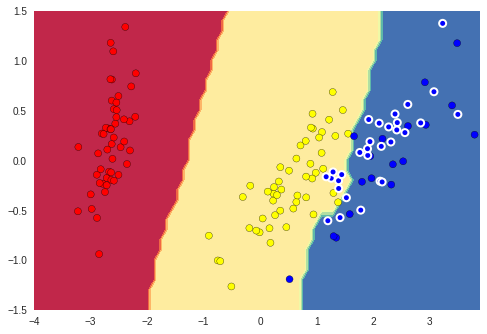

In [0]:
def visualiser_modele(model):
    
    levels = [0, 1, 2, 3]
    colors = ['red', 'yellow', 'blue']
    cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)
    
    # On crée un tableau de coordonnées pour chaque point du plan (une grille)
    xx, yy = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-1.5, 1.6, 0.1))
    X_grid = np.c_[xx.flatten(), yy.flatten()]

    # On calcule ce que prédit le classifier en chaque point de ce plan
    y_grid = model.predict(X_grid)

    # On dessine ce que le modèle prévoit sur le plan
    plt.contourf(xx, yy, y_grid.reshape(xx.shape), cmap='Spectral')

    # On affiche les points du training en contour noir
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker = "o", norm=norm, cmap=cmap, edgeColor='black')

    # On affiche les points du test en contour blanc
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker ="o",norm=norm, cmap=cmap, edgeColor='white', linewidths=2)
    
visualiser_modele(model_knn)

On se rend compte que notre séparation des données de tests et d'entrainement n'est pas optimale. Les données ont été mal préparées, le dataset n'était pas si parfait que ça. On a ici un problème d'*équilibre* du dataset qui n'est pas respecté, car il n'est pas mélangé. Compléter le code ci-dessous pour résoudre le problème et réentrainer le modèle.

Précision : 88%


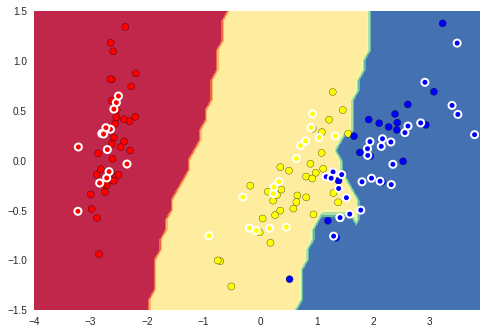

In [0]:
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(3)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
< Compléter >

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

## Pour aller plus loin
Ici on a une excellente précision, car on réserve relativement peu de données pour tester notre modèle. Pour tester l'efficacité du k-NN on peut faire différents tests :
- Modifier le code précédent pour utiliser moins de données d'entrainement et plus de données de test. Regarder comment s'en sort le NN.
- Modifier le k et voir les conséquences sur les performances. Par exemple avec l'approche naïve qui consisterait à regarder le point le plus proche uniquement (k=1). Quel problème apparaît ?
- Entrainer le classifier sur les données originales (pas de réduction de dimension)
- Chercher dans la doc de sklearn d'autres méthodes d'évaluation, essayer notamment d'afficher la matrice de confusion, très utile pour évaluer un classifier.
- **Essayer un autre classifier** ! Beaucoup sont disponibles sur scikit-learn, et ils fonctionnent de la même façon. Il n'y a **qu'une ligne à changer** dans le code ! (hormis l'importation...)

In [0]:
# Faire des tests ici

## Conclusion

L'objectif était de comprendre comment le machine learning s'opère en pratique, et de découvrir quelques difficultés liées à sa mise en place (dimensions, séparation des données, équilibre du dataset etc.).

## Points importants

- La **réduction de dimensions** est très pratique lorsqu'on veut visualiser nos données plus facilement, mais on perd des informations par ce processus.
- Il est important de conserver une partie du dataset pour **évaluer** le modèle.
- Il est important d'avoir un **dataset équilibré**, il faut notamment qu'il soit mélangé (que les classes apparaissent dans un ordre quelconque).

### Démarche à suivre en machine learning

- Préparer le jeu de données
- Séparer données d'entrainement et de test
- Choisir le modèle à utiliser
- Choisir les paramètres d'entraînement
- Entrainer le modèle
- Evaluer le modèle
- L'utiliser

### Utilisation d'un modèle non supervisé avec scikit-learn

- **Créer** le modèle, choisir les hyperparamètres
- **Entrainer du modèle** avec `fit`
- **Appliquer le modèle** aux données avec `transform`

### Utilisation d'un modèle supervisé avec scikit-learn

- **Créer** le modèle, choisir les hyperparamètres
- **Entrainer du modèle** avec `fit`
- **Utiliser le modèle** pour prédire les labels de nouvelles données avec `predict`